## Running Environment

In [1]:
IS_COLAB = False 
""" Set this as False when running locally and True when running on Colab """
""" Default: Local Running """

## Choice of Augmentation

In [ ]:
AUGMENTED_TO_ORIGINAL_RATIO = 1.2
""" If we have N original AF samples, after augmentation, 
(n x AUGMENTED_TO_ORIGINAL_RATIO) new AF samples will be generated by DCGAN """
""" Set this value as 0 if you don't need augmentation """
""" Please, note that the default value (1.2) is chosen based on the capacity of
 available RAM on Google Colab Pro """

## Mount Drive

In [2]:
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd drive/MyDrive/Projects/af-detection
    # !ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projects/af-detection


## Load libraries

In [1]:
import numpy as np
from sklearn.utils import shuffle
from Evaluation import evaluation
import gc


## Load AF Samples

In [5]:
af_images = np.load(
'/content/drive/MyDrive/Projects/Big-Files/AF.npy') # 360 x 360 AF samples
print('af_images.shape: ', af_images.shape)


af_images.shape:  (758, 360, 360)


## Split AF Samples Into 4 Folds

In [6]:
af_images = shuffle(af_images)
partitionIndex = af_images.shape[0] // 4
af_1 = af_images[:partitionIndex, :, :]
print('af_1.shape: ', af_1.shape)
af_2 = af_images[partitionIndex:2*partitionIndex, :, :]
print('af_2.shape: ', af_2.shape)
af_3 = af_images[2*partitionIndex:3*partitionIndex, :, :]
print('af_3.shape: ', af_3.shape)
af_4 = af_images[3*partitionIndex:, :, :]
print('af_4.shape: ', af_4.shape)
del af_images
gc.collect()

af_1.shape:  (189, 360, 360)
af_2.shape:  (189, 360, 360)
af_3.shape:  (189, 360, 360)
af_4.shape:  (191, 360, 360)


0

## Generate AF Samples If Needed

In [7]:
augment_1 = None
augment_2 = None
augment_3 = None
augment_4 = None

if AUGMENTED_TO_ORIGINAL_RATIO > 0:
    from DCGAN import augmentation
    n_fakeImagesEachFold = int(partitionIndex*AUGMENTED_TO_ORIGINAL_RATIO)
    augment_1 = augmentation(af_1, n_fakeImagesEachFold)
    print('augment_1.shape: ', augment_1.shape)
    augment_2 = augmentation(af_2, n_fakeImagesEachFold)
    print('augment_2.shape: ', augment_2.shape)
    augment_3 = augmentation(af_3, n_fakeImagesEachFold)
    print('augment_3.shape: ', augment_3.shape)
    augment_4 = augmentation(af_4, n_fakeImagesEachFold)
    print('augment_4.shape: ', augment_4.shape)
    del augmentation
    gc.collect()


Output hidden; open in https://colab.research.google.com to view.

## Load Normal Images

In [8]:
normal_images = np.load(
'/content/drive/MyDrive/Projects/Big-Files/normal.npy') # 360 x 360 normal samples
print('normal_images.shape: ', normal_images.shape)


normal_images.shape:  (5076, 360, 360)


## Split Normal Images Into 4 Folds

In [9]:
normal_images = shuffle(normal_images)
partitionIndex = normal_images.shape[0] // 4
normal_1 = normal_images[:partitionIndex, :, :]
print('normal_1.shape: ', normal_1.shape)
normal_2 = normal_images[partitionIndex:2*partitionIndex, :, :]
print('normal_2.shape: ', normal_2.shape)
normal_3 = normal_images[2*partitionIndex:3*partitionIndex, :, :]
print('normal_3.shape: ', normal_3.shape)
normal_4 = normal_images[3*partitionIndex:, :, :]
print('normal_4.shape: ', normal_4.shape)
del normal_images
gc.collect()

normal_1.shape:  (1269, 360, 360)
normal_2.shape:  (1269, 360, 360)
normal_3.shape:  (1269, 360, 360)
normal_4.shape:  (1269, 360, 360)


0

## Round 1

Added fake samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 358, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 179, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 179, 179, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 16)       0         
 2D)                                                             
                                     

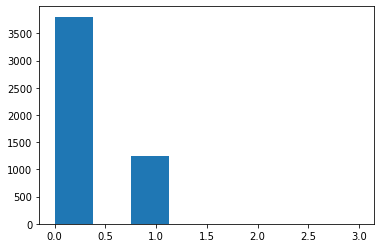

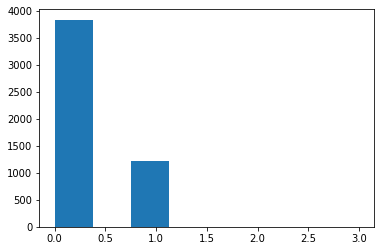

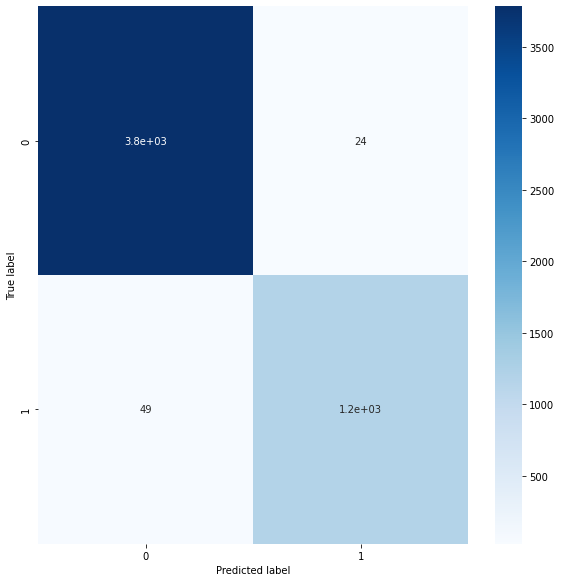

46/46 [==============================] - 1s 14ms/step
[[1248   21]
 [  42  147]]


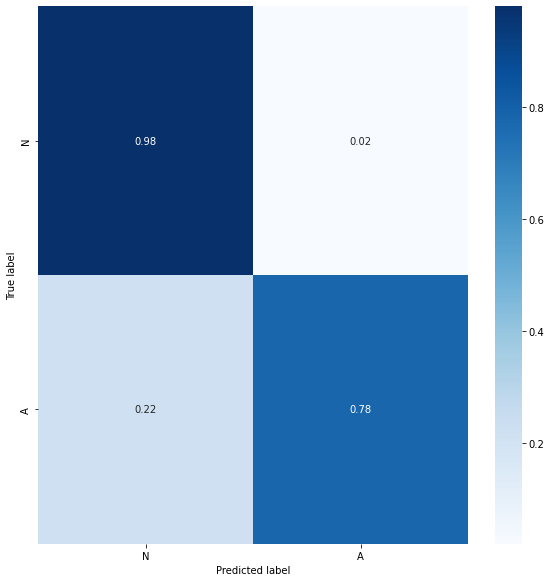

23292

In [ ]:
# Use fold 1 for validation
evaluation(normal_4, af_4, augment_4, normal_2, af_2, augment_2,
               normal_3, af_3, augment_3, val_normal=normal_1, val_af=af_1, checkpoint_filepath='./checkpoints/my_checkpoint/best_1', showModelSummary=True)
gc.collect()


## Round 2

Added fake samples
Epoch 1/25
157/158 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8744 - recall: 0.8744 - precision: 0.8744
Epoch 1: val_accuracy improved from -inf to 0.87037, saving model to ./checkpoints/my_checkpoint/best_2
158/158 [==============================] - 11s 58ms/step - loss: 0.4105 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.8750 - val_loss: 0.4271 - val_accuracy: 0.8704 - val_recall: 0.8704 - val_precision: 0.8704
Epoch 2/25
158/158 [==============================] - ETA: 0s - loss: 0.2217 - accuracy: 0.9406 - recall: 0.9406 - precision: 0.9406
Epoch 2: val_accuracy did not improve from 0.87037
158/158 [==============================] - 8s 50ms/step - loss: 0.2217 - accuracy: 0.9406 - recall: 0.9406 - precision: 0.9406 - val_loss: 0.3272 - val_accuracy: 0.8704 - val_recall: 0.8704 - val_precision: 0.8704
Epoch 3/25
158/158 [==============================] - ETA: 0s - loss: 0.1854 - accuracy: 0.9456 - recall: 0.9456 - precision: 0.945

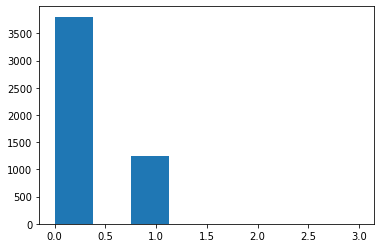

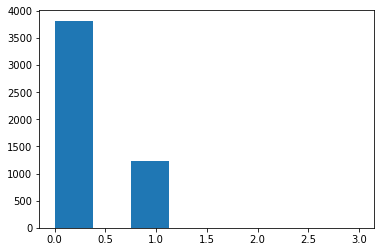

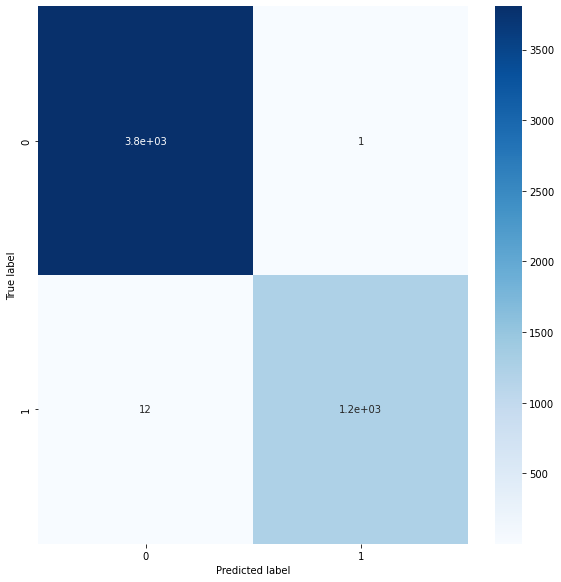

46/46 [==============================] - 1s 16ms/step
[[1250   19]
 [  32  157]]


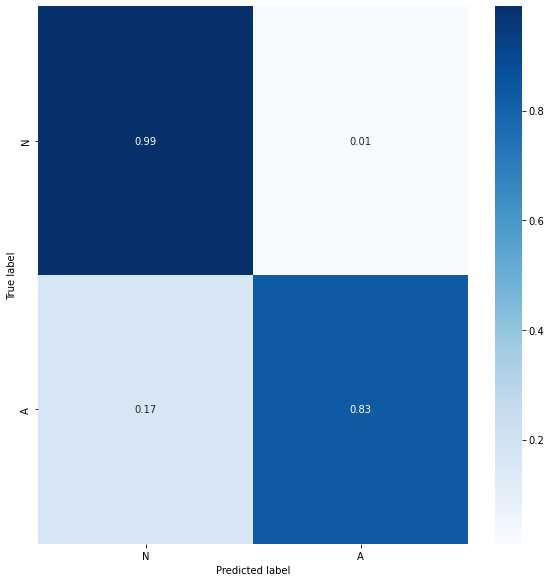

23232

In [ ]:
# Use fold 2 for validation
evaluation(normal_1, af_1, augment_1, normal_4, af_4, augment_4,
               normal_3, af_3, augment_3, val_normal=normal_2, val_af=af_2, checkpoint_filepath='./checkpoints/my_checkpoint/best_2')
gc.collect()


## Round 3

Added fake samples
Epoch 1/25
158/158 [==============================] - ETA: 0s - loss: 0.4238 - accuracy: 0.8575 - recall: 0.8575 - precision: 0.8575
Epoch 1: val_accuracy improved from -inf to 0.87037, saving model to ./checkpoints/my_checkpoint/best_3
158/158 [==============================] - 11s 58ms/step - loss: 0.4238 - accuracy: 0.8575 - recall: 0.8575 - precision: 0.8575 - val_loss: 0.3955 - val_accuracy: 0.8704 - val_recall: 0.8704 - val_precision: 0.8704
Epoch 2/25
157/158 [============================>.] - ETA: 0s - loss: 0.2297 - accuracy: 0.9359 - recall: 0.9359 - precision: 0.9359
Epoch 2: val_accuracy did not improve from 0.87037
158/158 [==============================] - 8s 50ms/step - loss: 0.2296 - accuracy: 0.9355 - recall: 0.9355 - precision: 0.9355 - val_loss: 0.5854 - val_accuracy: 0.8663 - val_recall: 0.8663 - val_precision: 0.8663
Epoch 3/25
157/158 [============================>.] - ETA: 0s - loss: 0.1789 - accuracy: 0.9449 - recall: 0.9449 - precision: 0.944

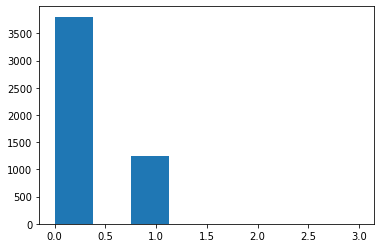

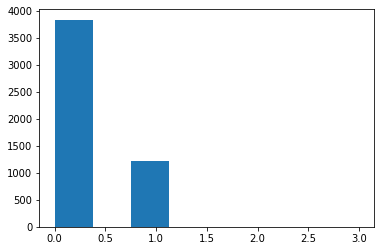

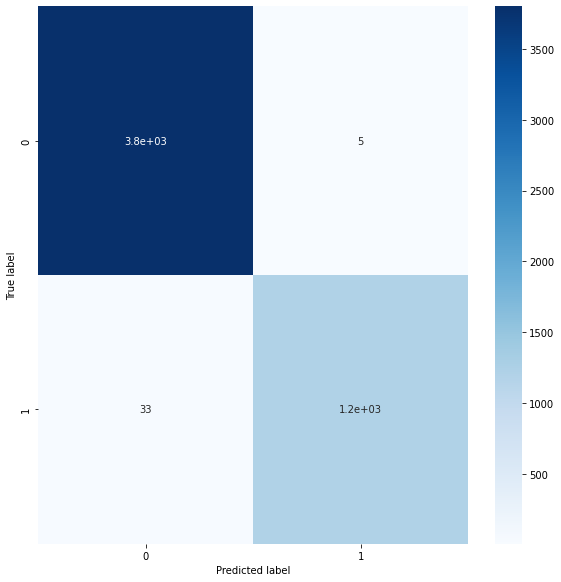

46/46 [==============================] - 1s 15ms/step
[[1242   27]
 [  28  161]]


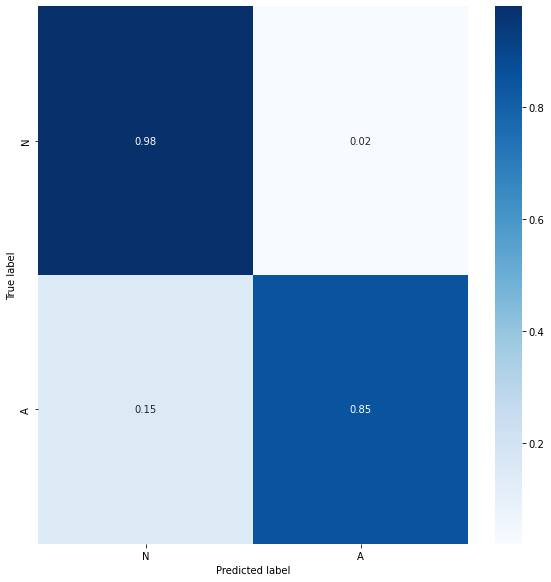

23228

In [ ]:
# Use fold 3 for validation
evaluation(normal_1, af_1, augment_1, normal_2, af_2, augment_2,
               normal_4, af_4, augment_4, val_normal=normal_3, val_af=af_3, checkpoint_filepath='./checkpoints/my_checkpoint/best_3')
gc.collect()


## Round 4

In [ ]:
# Use fold 4 for validation
evaluation(normal_1, af_1, augment_1, normal_2, af_2, augment_2,
               normal_3, af_3, augment_3, val_normal=normal_4, val_af=af_4, checkpoint_filepath='./checkpoints/my_checkpoint/best_4')
gc.collect()
